# Logistic Regression

Author : Prathamesh Joshi



**Logistic regression**

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

******************************************************************************

**When should you use logistic regression?**

When you want to model binary data :- Logistic regression is a go-to model for this use case. It models the probability that an observation takes on one of those two values.

When the decision boundary is smooth and linear :- Logistic regression draws a smooth, linear decision boundary between two classes. Thus if your classes are linearly separable , logistic regression will perform very well.

******************************************************************************


The standard logistic function (or sigmoid function) <br>
Y(z) = 1 / (1+ e^-z) = e^z/(1+e^z)

## **Logistic Regression**

In [0]:
# we import the necessary libraries 
from sklearn.datasets import make_classification #this will help us to generate the data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix # we will use this to map a confusion matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

*As logistic regression is a binary classification model lets generate a binary data or data with two classes*

In [0]:
X, y = make_classification(n_samples = 100, n_features=1, 
                           n_classes=2, n_clusters_per_class=1, 
                           flip_y=0.03,         # few samples are assigned class randomly so 0.03 of 100 samples ie 3
                           n_informative=1,
                           n_redundant=0, # number of redundant features should be 0 : default is 1
                           n_repeated=0) # no repeated or duplicate features should be 0 : as default is 2

## Visualize the data

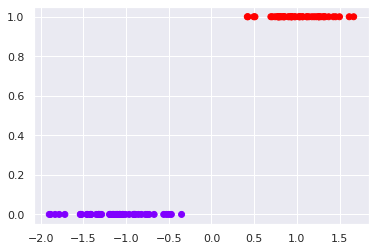

In [4]:
plt.scatter(X, y, c=y, cmap='rainbow')

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)  # splitting the data into training and testing

# Building the regression

In [0]:
model = LogisticRegression() 

In [7]:
model.fit(X_train,y_train) # fitting the data 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
model.coef_ # coefficent 

array([[3.08916859]])

In [9]:
model.intercept_ # intercept

array([0.13663044])

In [0]:
y_pred = model.predict(X_test)

In [11]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0])

In [12]:
model.predict_proba(X_test) # it gives 2 colums which shows what is the probability of a given data in class 1 or 2 respectively

array([[0.15331628, 0.84668372],
       [0.06305647, 0.93694353],
       [0.03116357, 0.96883643],
       [0.92460343, 0.07539657],
       [0.97099117, 0.02900883],
       [0.99008627, 0.00991373],
       [0.96754799, 0.03245201],
       [0.91663058, 0.08336942],
       [0.98087706, 0.01912294],
       [0.9448459 , 0.0551541 ],
       [0.05821785, 0.94178215],
       [0.7202956 , 0.2797044 ],
       [0.04951086, 0.95048914],
       [0.98113651, 0.01886349],
       [0.07246668, 0.92753332],
       [0.07442492, 0.92557508],
       [0.9558376 , 0.0441624 ],
       [0.95969931, 0.04030069],
       [0.98959431, 0.01040569],
       [0.02665342, 0.97334658],
       [0.00594147, 0.99405853],
       [0.05149067, 0.94850933],
       [0.99537509, 0.00462491],
       [0.93490015, 0.06509985],
       [0.98587247, 0.01412753]])

 As one can see in y_pred the first 3 values where 1 ie it belongs to a class 2 or we can say ( same class) so our model has correctly predicted its probability around 84-97% that they belong to class 2 and so on

The first column corresponds to the probability that the sample belongs to the first class and the second column corresponds to the probability that the sample belongs to the second class.

## **Confusion matrix**

In [13]:
confusion_matrix(y_test, y_pred)

array([[15,  0],
       [ 0, 10]])

In [19]:
model.score(X_test,y_test)

1.0

Our model is 100% accurate !!

#**Plotting the sigmoid**

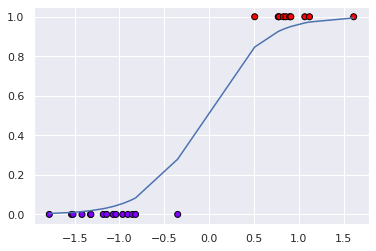

In [15]:
df = pd.DataFrame({'x': X_test[:,0], 'y': y_test})
df = df.sort_values(by='x')

from scipy.special import expit # using scipy to do tedious calculations 

sigmoid_function = expit(df['x'] * model.coef_[0][0] + model.intercept_[0]).ravel()
plt.plot(df['x'], sigmoid_function)
plt.scatter(df['x'], df['y'], c=df['y'], cmap='rainbow', edgecolors='black')